In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [3]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

original_hist = original_model.fit(x_train, y_train, 
                                   epochs=20, batch_size=512, 
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 20ms/step - loss: 0.4487 - accuracy: 0.8244 - val_loss: 0.3403 - val_accuracy: 0.8759
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2593 - accuracy: 0.9087 - val_loss: 0.2913 - val_accuracy: 0.8852
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2010 - accuracy: 0.9274 - val_loss: 0.2815 - val_accuracy: 0.8860
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1694 - accuracy: 0.9390 - val_loss: 0.2925 - val_accuracy: 0.8831
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1447 - accuracy: 0.9495 - val_loss: 0.3121 - val_accuracy: 0.8797
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1272 - accuracy: 0.9558 - val_loss: 0.3306 - val_accuracy: 0.8772
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1115 - accuracy: 0.9612 - val_loss: 0.3584 - val_accuracy: 0.8713
Epoch 8/20
49

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop', 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20, batch_size=512, 
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 20ms/step - loss: 0.4776 - accuracy: 0.8101 - val_loss: 0.3616 - val_accuracy: 0.8755
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2827 - accuracy: 0.9049 - val_loss: 0.2971 - val_accuracy: 0.8882
Epoch 3/20
49/49 [==============================] - 1s 10ms/step - loss: 0.2187 - accuracy: 0.9262 - val_loss: 0.2881 - val_accuracy: 0.8861
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1817 - accuracy: 0.9384 - val_loss: 0.2845 - val_accuracy: 0.8856
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1596 - accuracy: 0.9462 - val_loss: 0.3003 - val_accuracy: 0.8804
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1413 - accuracy: 0.9520 - val_loss: 0.3121 - val_accuracy: 0.8790
Epoch 7/20
49/49 [==============================] - 0s 10ms/step - loss: 0.1277 - accuracy: 0.9574 - val_loss: 0.3221 - val_accuracy: 0.8775
Epoch 8/20
49

In [6]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

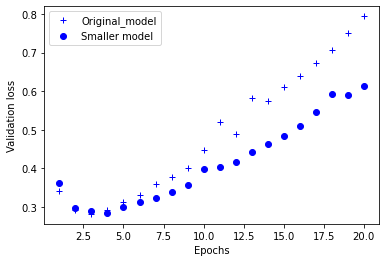

In [7]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original_model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [8]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop', 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20, batch_size=512, 
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 127ms/step - loss: 0.5207 - accuracy: 0.7938 - val_loss: 0.2748 - val_accuracy: 0.8903
Epoch 2/20
49/49 [==============================] - 6s 120ms/step - loss: 0.2316 - accuracy: 0.9118 - val_loss: 0.3050 - val_accuracy: 0.8754
Epoch 3/20
49/49 [==============================] - 6s 119ms/step - loss: 0.1263 - accuracy: 0.9526 - val_loss: 0.3604 - val_accuracy: 0.8684
Epoch 4/20
49/49 [==============================] - 6s 120ms/step - loss: 0.0697 - accuracy: 0.9782 - val_loss: 0.5519 - val_accuracy: 0.8180
Epoch 5/20
49/49 [==============================] - 6s 120ms/step - loss: 0.0094 - accuracy: 0.9981 - val_loss: 4.0166 - val_accuracy: 0.6009
Epoch 6/20
49/49 [==============================] - 6s 120ms/step - loss: 0.0825 - accuracy: 0.9868 - val_loss: 0.6198 - val_accuracy: 0.8823
Epoch 7/20
49/49 [==============================] - 6s 120ms/step - loss: 1.3336e-04 - accuracy: 1.0000 - val_loss: 0.8397 - val_accuracy: 0.8770
Ep

In [9]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

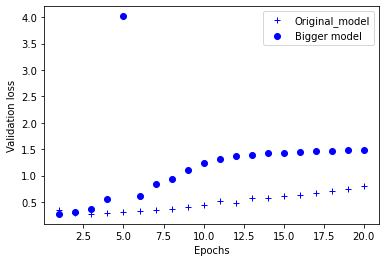

In [10]:
plt.plot(epochs, original_val_loss, 'b+', label='Original_model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [11]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

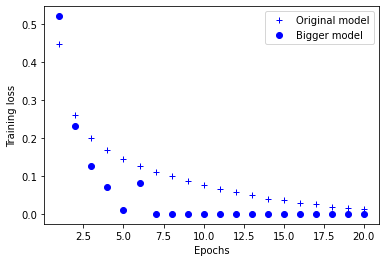

In [12]:
plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [13]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                       activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                       activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

l2_model_hist = l2_model.fit(x_train, y_train, 
                             epochs=20, batch_size=512, 
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 18ms/step - loss: 0.4964 - accuracy: 0.8148 - val_loss: 0.3727 - val_accuracy: 0.8843
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3119 - accuracy: 0.9049 - val_loss: 0.3465 - val_accuracy: 0.8809
Epoch 3/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2655 - accuracy: 0.9226 - val_loss: 0.3308 - val_accuracy: 0.8889
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2498 - accuracy: 0.9264 - val_loss: 0.3411 - val_accuracy: 0.8851
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2356 - accuracy: 0.9346 - val_loss: 0.3437 - val_accuracy: 0.8841
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2281 - accuracy: 0.9367 - val_loss: 0.4107 - val_accuracy: 0.8596
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2185 - accuracy: 0.9409 - val_loss: 0.3928 - val_accuracy: 0.8686
Epoch 8/20
49

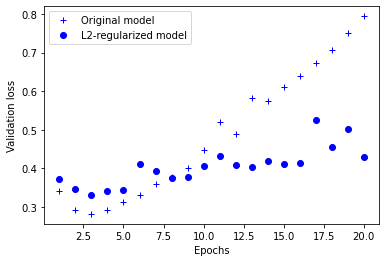

In [14]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [15]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), 
                       activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), 
                       activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

l1_model.compile(optimizer='rmsprop', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

l1_model_hist = l1_model.fit(x_train, y_train, 
                             epochs=20, batch_size=512, 
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 19ms/step - loss: 0.9168 - accuracy: 0.7764 - val_loss: 0.6840 - val_accuracy: 0.8026
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.6305 - accuracy: 0.8415 - val_loss: 0.6194 - val_accuracy: 0.8449
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5897 - accuracy: 0.8546 - val_loss: 0.5813 - val_accuracy: 0.8561
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 0.5802 - accuracy: 0.8554 - val_loss: 0.5553 - val_accuracy: 0.8661
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5602 - accuracy: 0.8624 - val_loss: 0.5597 - val_accuracy: 0.8607
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5614 - accuracy: 0.8592 - val_loss: 0.5686 - val_accuracy: 0.8534
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 0.5465 - accuracy: 0.8626 - val_loss: 0.5653 - val_accuracy: 0.8534
Epoch 8/20
49

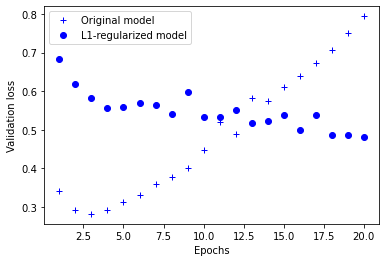

In [16]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [17]:
l1_l2_model = models.Sequential()
l1_l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                       activation='relu', input_shape=(10000,)))
l1_l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                       activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))

l1_l2_model.compile(optimizer='rmsprop', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

l1_l2_model_hist = l1_l2_model.fit(x_train, y_train, 
                             epochs=20, batch_size=512, 
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 18ms/step - loss: 0.9604 - accuracy: 0.7615 - val_loss: 0.7121 - val_accuracy: 0.8136
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.6623 - accuracy: 0.8396 - val_loss: 0.6282 - val_accuracy: 0.8476
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.6048 - accuracy: 0.8528 - val_loss: 0.5933 - val_accuracy: 0.8535
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 0.5748 - accuracy: 0.8576 - val_loss: 0.5957 - val_accuracy: 0.8409
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5588 - accuracy: 0.8604 - val_loss: 0.5523 - val_accuracy: 0.8608
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5453 - accuracy: 0.8621 - val_loss: 0.5388 - val_accuracy: 0.8640
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 0.5352 - accuracy: 0.8648 - val_loss: 0.5405 - val_accuracy: 0.8620
Epoch 8/20
49

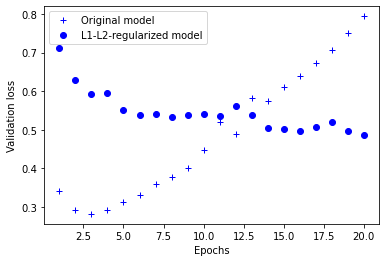

In [18]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_l2_model_val_loss, 'bo', label='L1-L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [19]:
l1_model2 = models.Sequential()
l1_model2.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001), 
                       activation='relu', input_shape=(10000,)))
l1_model2.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001), 
                       activation='relu'))
l1_model2.add(layers.Dense(1, activation='sigmoid'))

l1_model2.compile(optimizer='rmsprop', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

l1_model2_hist = l1_model2.fit(x_train, y_train, 
                             epochs=20, batch_size=512, 
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 18ms/step - loss: 0.5588 - accuracy: 0.8186 - val_loss: 0.4721 - val_accuracy: 0.8362
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 0.3699 - accuracy: 0.8985 - val_loss: 0.3701 - val_accuracy: 0.8890
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3318 - accuracy: 0.9071 - val_loss: 0.3622 - val_accuracy: 0.8875
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3126 - accuracy: 0.9132 - val_loss: 0.3592 - val_accuracy: 0.8881
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.3019 - accuracy: 0.9169 - val_loss: 0.3905 - val_accuracy: 0.8758
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2958 - accuracy: 0.9197 - val_loss: 0.3848 - val_accuracy: 0.8788
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2889 - accuracy: 0.9222 - val_loss: 0.3709 - val_accuracy: 0.8838
Epoch 8/20
49

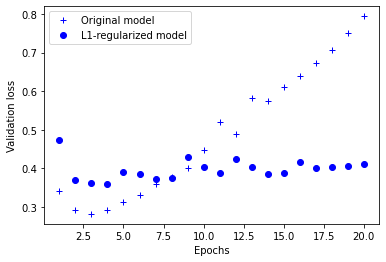

In [20]:
l1_model2_val_loss = l1_model2_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model2_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [21]:
l1_l2_model2 = models.Sequential()
l1_l2_model2.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001), 
                       activation='relu', input_shape=(10000,)))
l1_l2_model2.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001), 
                       activation='relu'))
l1_l2_model2.add(layers.Dense(1, activation='sigmoid'))

l1_l2_model2.compile(optimizer='rmsprop', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

l1_l2_model2_hist = l1_l2_model2.fit(x_train, y_train, 
                             epochs=20, batch_size=512, 
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 17ms/step - loss: 0.5676 - accuracy: 0.8109 - val_loss: 0.4347 - val_accuracy: 0.8748
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3813 - accuracy: 0.8917 - val_loss: 0.3815 - val_accuracy: 0.8830
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3400 - accuracy: 0.9040 - val_loss: 0.3658 - val_accuracy: 0.8866
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 0.3243 - accuracy: 0.9072 - val_loss: 0.3694 - val_accuracy: 0.8839
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3098 - accuracy: 0.9136 - val_loss: 0.3619 - val_accuracy: 0.8862
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3051 - accuracy: 0.9153 - val_loss: 0.3639 - val_accuracy: 0.8866
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2991 - accuracy: 0.9194 - val_loss: 0.3655 - val_accuracy: 0.8867
Epoch 8/20
49

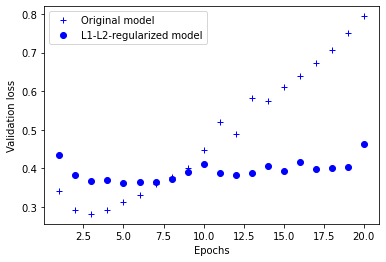

In [22]:
l1_l2_model2_val_loss = l1_l2_model2_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_l2_model2_val_loss, 'bo', label='L1-L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [23]:
dropout_model = models.Sequential()
dropout_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(16, activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(1, activation='sigmoid'))

dropout_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

dropout_model_hist = dropout_model.fit(x_train, y_train, 
                                   epochs=20, batch_size=512, 
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 19ms/step - loss: 0.6061 - accuracy: 0.6677 - val_loss: 0.4605 - val_accuracy: 0.8504
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 0.4513 - accuracy: 0.8043 - val_loss: 0.3482 - val_accuracy: 0.8821
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3652 - accuracy: 0.8634 - val_loss: 0.2991 - val_accuracy: 0.8878
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3124 - accuracy: 0.8934 - val_loss: 0.2909 - val_accuracy: 0.8831
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2744 - accuracy: 0.9094 - val_loss: 0.2881 - val_accuracy: 0.8880
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2464 - accuracy: 0.9224 - val_loss: 0.2894 - val_accuracy: 0.8858
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2217 - accuracy: 0.9308 - val_loss: 0.3052 - val_accuracy: 0.8871
Epoch 8/20
49

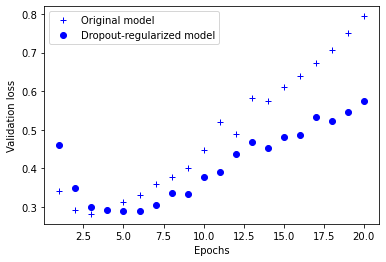

In [24]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()